In [17]:
import pandas as pd
from typing import Type
import sys

sys.path.append("..")
from utils import print_memory_stats, change_obj_to_cat, get_memory_stats

file_name = "vacancies.csv.gz"
column_types_name = "column_types.pkl"
ten_columns_name = "10_columns.csv"


def change_types(my_df: pd.DataFrame):
    memory_stats = get_memory_stats(my_df, file_name)
    print_memory_stats(memory_stats[0], memory_stats[1], memory_stats[2], "mem_res_no_opt.json")
    print("before:")
    print(my_df.info(memory_usage="deep"))
    change_obj_to_cat(my_df)
    memory_stats = get_memory_stats(my_df, file_name)
    print_memory_stats(memory_stats[0], memory_stats[1], memory_stats[2], "mem_res_opt.json")
    print("after:")
    print(my_df.info(memory_usage="deep"))


def save_10_columns(my_df: pd.DataFrame):
    column_names = [
        "schedule_id",
        "accept_handicapped",
        "accept_kids",
        "experience_id",
        "employer_name",
        "salary_from",
        "salary_to",
        "area_name",
        "response_letter_required",
        "archived",
    ]
    types = my_df.dtypes.to_dict()
    rf = pd.read_csv(
        file_name,
        usecols=lambda x: x in column_names,
        dtype=types,
    )
    compression_options = dict(method="zip", archive_name=ten_columns_name)
    rf.to_csv(f"{ten_columns_name}.zip", index=False, compression="zip")

    compression_options = dict(method="zip", archive_name=column_types_name)
    pd.to_pickle(types, f"{column_types_name}.zip", compression=compression_options)


my_df = pd.read_csv(file_name, compression="zip")
change_types(my_df)
save_10_columns(my_df)

loaded_column_types = pd.read_pickle(f"{column_types_name}.zip", compression="zip")
df = pd.read_csv(f"{ten_columns_name}.zip", dtype=loaded_column_types, compression="zip")
df

before:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587637 entries, 0 to 587636
Data columns (total 56 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         587637 non-null  int64  
 1   description                587637 non-null  object 
 2   key_skills                 431738 non-null  object 
 3   schedule_id                587637 non-null  object 
 4   schedule_name              587637 non-null  object 
 5   accept_handicapped         587637 non-null  bool   
 6   accept_kids                587637 non-null  bool   
 7   experience_id              587637 non-null  object 
 8   experience_name            587637 non-null  object 
 9   specializations            587637 non-null  object 
 10  contacts                   12130 non-null   object 
 11  billing_type_id            587637 non-null  object 
 12  billing_type_name          587637 non-null  object 
 13  allow_messages       

,schedule_id,accept_handicapped,accept_kids,experience_id,employer_name,response_letter_required,salary_from,salary_to,archived,area_name
0,fullDay,False,False,between1And3,Смарт консалтинг,False,NaN,NaN,False,Новосибирск
1,fullDay,False,False,between1And3,Vigrom Corp.,False,NaN,NaN,True,Пенза
2,remote,True,False,noExperience,Яндекс,False,NaN,NaN,True,Санкт-Петербург
3,fullDay,False,False,noExperience,МегаФон Ритейл,False,23000.0,29000.0,True,Копейск
4,fullDay,False,False,between1And3,"Северсталь, Москва",False,NaN,NaN,True,Череповец
...,...,...,...,...,...,...,...,...,...,...
587632,fullDay,False,False,between3And6,ЭЛСИ ГРУПП,False,NaN,NaN,True,Новосибирск
587633,fullDay,False,False,noExperience,ТаксНет,False,40000.0,NaN,True,Казань
587634,fullDay,True,False,moreThan6,PwC,False,NaN,NaN,True,Казань
587635,fullDay,False,False,between3And6,GrowFood,False,NaN,NaN,True,Санкт-Петербург


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Count of Jobs for Each Schedule')

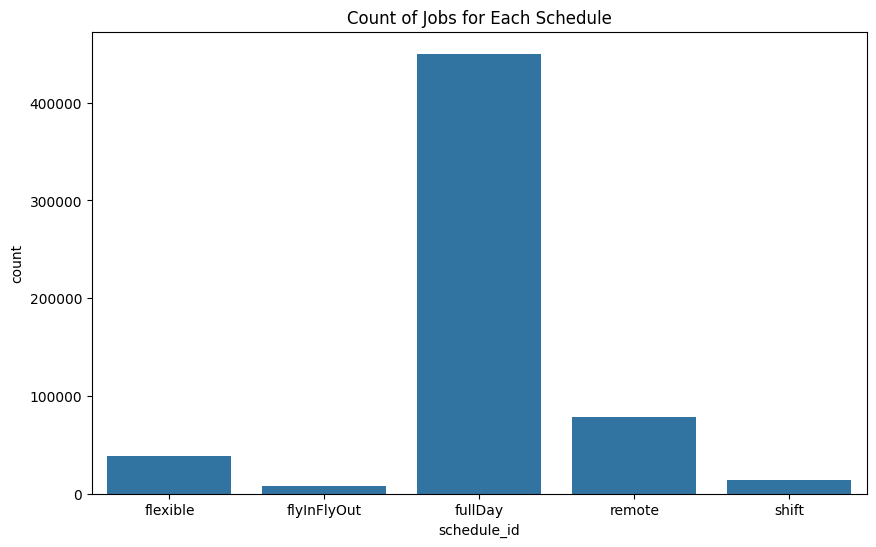

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='schedule_id', data=df)
plt.title('Count of Jobs for Each Schedule')

Text(0, 0.5, 'Density')

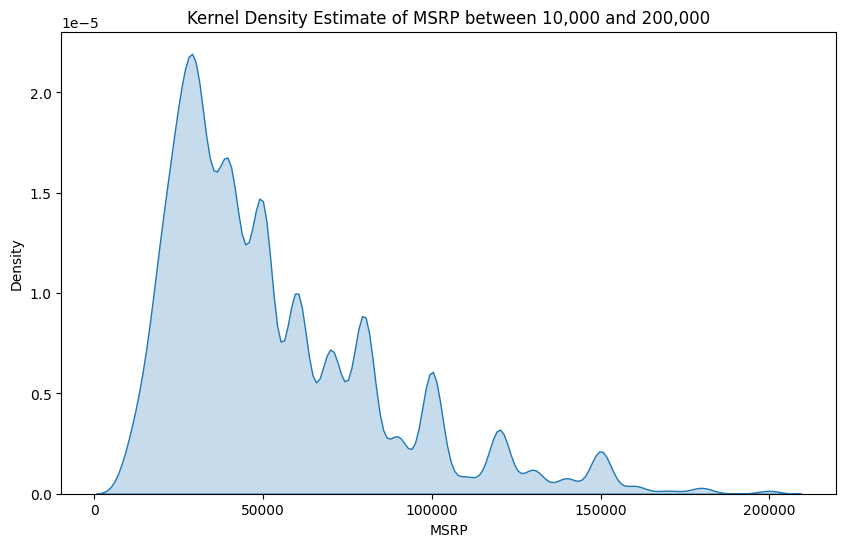

In [20]:
df_filtered_msrp = df[(df["salary_from"] >= 10000) & (df["salary_to"] <= 200000)]

plt.figure(figsize=(10, 6))
sns.kdeplot(df_filtered_msrp["salary_from"], fill=True)
plt.title("Kernel Density Estimate of MSRP between 10,000 and 200,000")
plt.xlabel("MSRP")
plt.ylabel("Density")

Text(0.5, 1.0, 'Percentage of Archived Jobs')

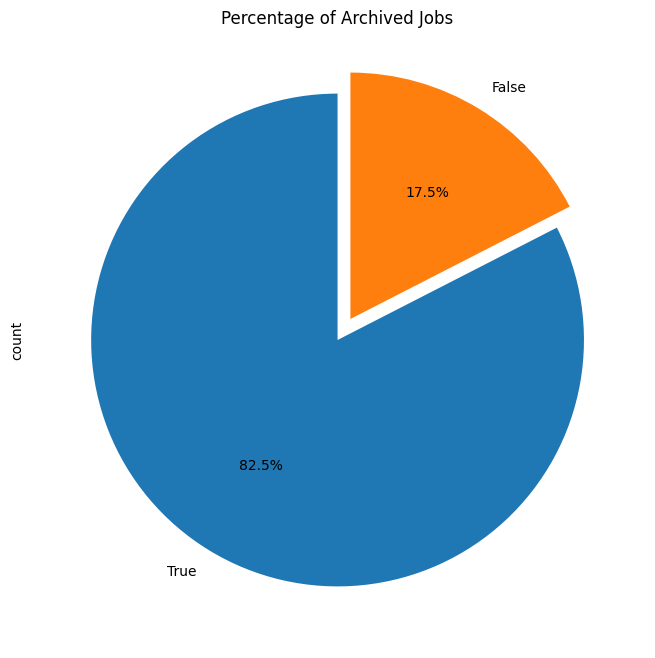

In [21]:
plt.figure(figsize=(8, 8))
df['archived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0, 0.1])
plt.title('Percentage of Archived Jobs')

Text(0.5, 1.0, 'Correlation Heatmap')

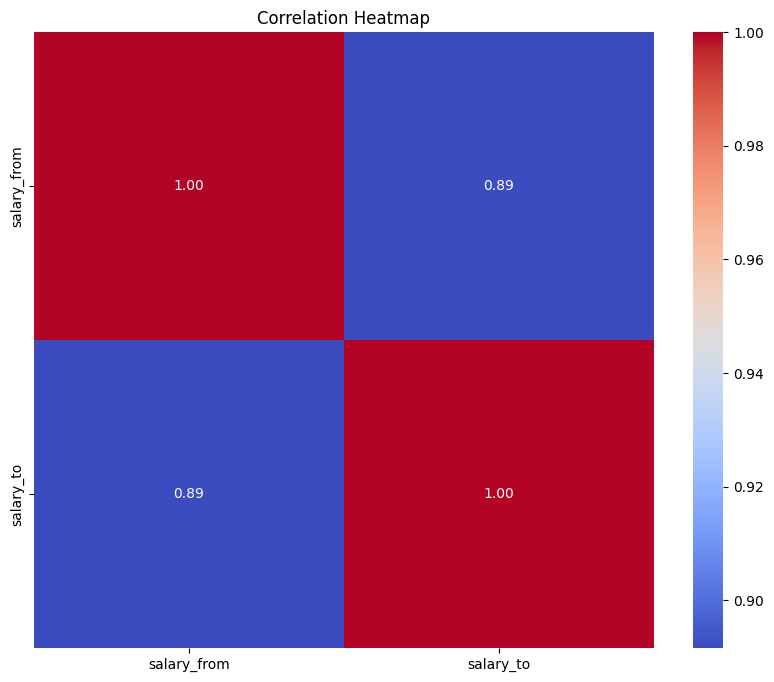

In [22]:
numeric_columns = df.select_dtypes(include=[float, int]).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

Text(0, 0.5, 'Number of Job Postings')

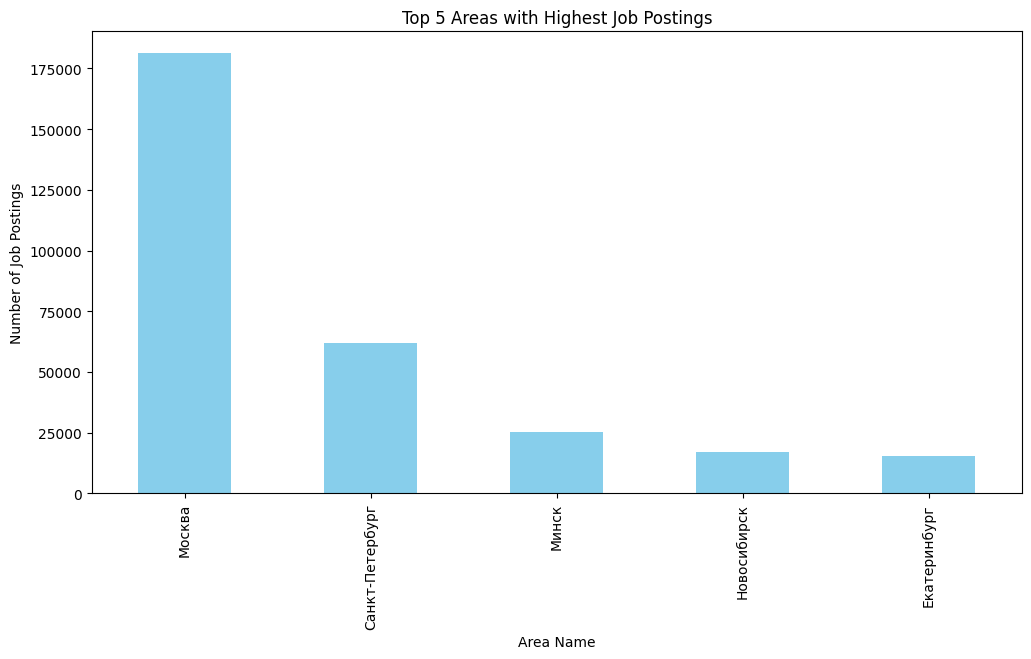

In [23]:
top_areas = df['area_name'].value_counts().nlargest(5)
plt.figure(figsize=(12, 6))
top_areas.plot(kind='bar', color='skyblue')
plt.title('Top 5 Areas with Highest Job Postings')
plt.xlabel('Area Name')
plt.ylabel('Number of Job Postings')